In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


In [3]:
%pip install plotly

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [4]:
import sys
import pathlib

PROJECT_ROOT = pathlib.Path().cwd().parent
sys.path.append(str(PROJECT_ROOT))


from src.utils import *
# import nibabel as nib


image_path = PROJECT_ROOT / 'ReMIND2Reg_dataset' / 'imagesTr'

In [5]:
patient_id = "003" # between 000 and 102, t1 and t2 don't exist for all patients
iUS_file = f"ReMIND2Reg_0{patient_id}_0000.nii.gz"
t1_file = f"ReMIND2Reg_0{patient_id}_0001.nii.gz"
t2_file = f"ReMIND2Reg_0{patient_id}_0002.nii.gz"

# Load the NIfTI file
# img_iUS = nib.load(image_path / iUS_file)
# img_t1 = nib.load(image_path / t1_file)
# img_t2 = nib.load(image_path / t2_file)

# # Extract image data as a numpy array
# img_iUS_data = img_iUS.get_fdata()
# img_t1_data = img_t1.get_fdata()
# img_t2_data = img_t2.get_fdata()
# print("Image shape:", img_iUS_data.shape)

# slice_idx = img_iUS_data.shape[2] // 2

In [29]:
from src.datatype import MRIDataset

dataset = MRIDataset([image_path / t1_file], "T1", axis=0)

In [ ]:
dataset.

## 2D Visualisation

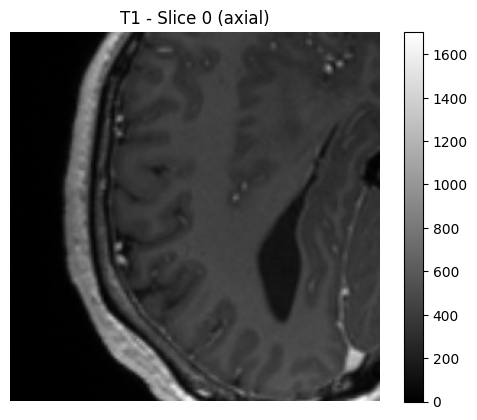

In [42]:
dataset = MRIDataset([image_path / t1_file], "T1", axis=0)
dataset.plot2D();

## 3D Viualization of the iUS image

In [ ]:
dataset.plot3D()